In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.io import loadmat
import rasterio

# Load model outputs
data = loadmat('/Users/lixintong/Desktop/datalambda0_sigma0_prunedouble.mat')
predictions = data['opt_QLF']  # Adjust key based on your specific need

# Load ground truth
with rasterio.open('/Users/lixintong/Desktop/大三上/大数据并行计算/并行大作业/第三次作业/Bayesian_Causal-main/data/2023_turkey/ground_truth/2023_turkey_liquefaction_ground_truth_rasterized.tif') as gt_landslide:
    gt_data = gt_landslide.read(1)

# Ensure dimensions match (crop or interpolate predictions if necessary)
predictions = predictions[:gt_data.shape[0], :gt_data.shape[1]]  # Example cropping

# Flatten arrays for comparison
y_true = gt_data.flatten()
y_pred = predictions.flatten()

# Remove NaNs or invalid values if present
valid_mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
y_true = y_true[valid_mask]
y_pred = y_pred[valid_mask]

print("y_true unique values:", np.unique(y_true))
print("y_pred unique values:", np.unique(y_pred))
print("y_true dtype:", y_true.dtype)
print("y_pred dtype:", y_pred.dtype)


y_true unique values: [0.00000000e+00 1.50780731e-12 1.52344382e-12 ... 2.56579998e-01
 2.57039998e-01 2.57499992e-01]
y_pred unique values: [0.5        0.54485685 0.545168   ... 0.66475916 0.6651066  0.6651167 ]
y_true dtype: float64
y_pred dtype: float32


In [8]:
# 假设真值大于 0 的点为正类（根据具体需求调整）
y_true = (y_true > 0).astype(int)
y_pred = y_pred.astype(float)

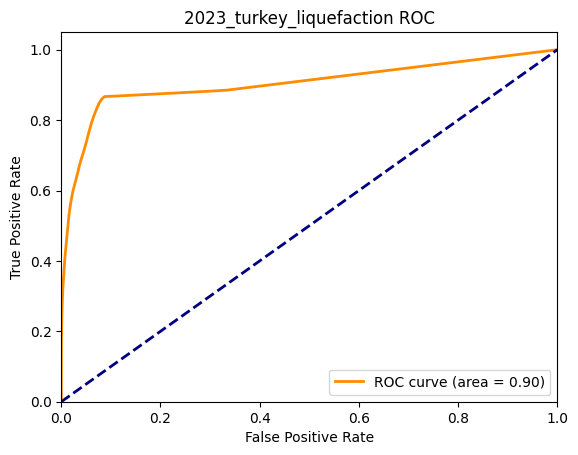

In [9]:

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('2023_turkey_liquefaction ROC')
plt.legend(loc="lower right")
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score
import rasterio
from rasterio.plot import show
from scipy.io import loadmat

In [15]:
# 加载模型预测结果
data = loadmat('/Users/lixintong/Desktop/datalambda0_sigma0_prunedouble.mat')
predictions = data['opt_QLF']  # 根据论文选择目标变量，如opt_QLS表示滑坡预测

# 加载真值
# gt_path = '/Users/lixintong/Desktop/大三上/大数据并行计算/并行大作业/第三次作业/Bayesian_Causal-main/data/2023_turkey/ground_truth/2023_turkey_landslide_ground_truth_rasterized.tif'
gt_path ='/Users/lixintong/Desktop/大三上/大数据并行计算/并行大作业/第三次作业/Bayesian_Causal-main/data/2023_turkey/ground_truth/2023_turkey_liquefaction_ground_truth_rasterized.tif'
with rasterio.open(gt_path) as gt_file:
    ground_truth = gt_file.read(1)  # 读取第一个波段

# 确保预测和真值尺寸一致
predictions = predictions[:ground_truth.shape[0], :ground_truth.shape[1]]

# 展平数组，排除无效值
y_true = ground_truth.flatten()
y_pred = predictions.flatten()

# 去除 NaN 值
valid_mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
y_true = y_true[valid_mask]
y_pred = y_pred[valid_mask]

# 将真值转为二值标签
y_true = (y_true > 0).astype(int)

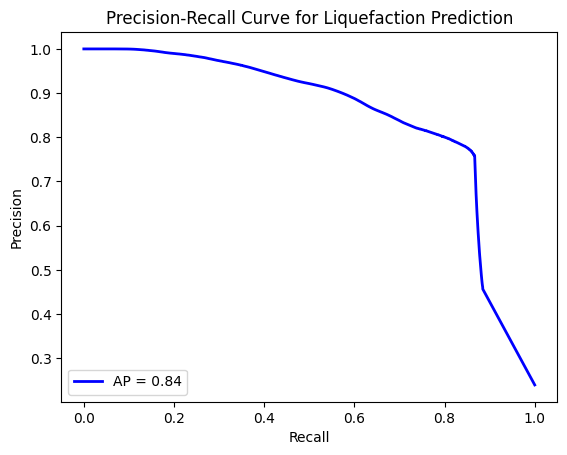

In [16]:
# 计算 Precision-Recall 曲线
precision, recall, _ = precision_recall_curve(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)

# 绘制 Precision-Recall 曲线
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Liquefaction Prediction')
plt.legend(loc='lower left')
plt.show()

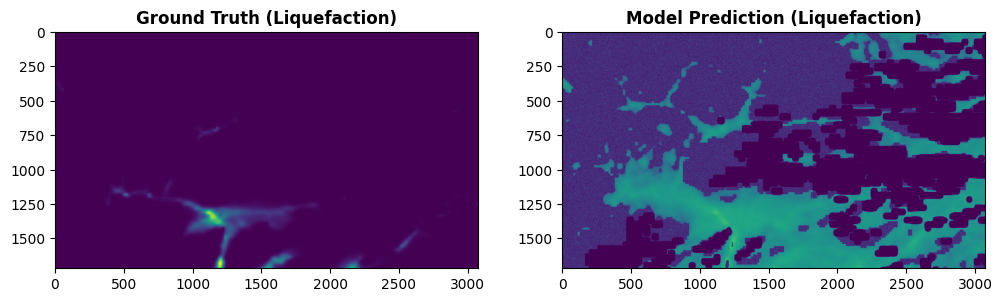

In [18]:
# 将预测结果和真值映射回二维
predictions_2d = predictions[:ground_truth.shape[0], :ground_truth.shape[1]]

# 绘制真值与预测的地理热力图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
show(ground_truth, ax=axes[0], title='Ground Truth (Liquefaction)')
show(predictions_2d, ax=axes[1], title='Model Prediction (Liquefaction)')
plt.show()